# Examples:
Let's look at some of the most commonly used things this library can do to collect and post-process IQ data from an RTL-SDR.

In [1]:
from rtlobs import collect as col
from rtlobs import post_process as post

We can find the total power incident on the SDR by integrating the complex samples at a certain frequency for an amount of time:

In [2]:
# 1024-bin resolution power spectrum 
# 49.6 dB of RtlSdr gain
# 2.048 MHz sample rate/bandwidth
# 91.3 MHz center frequency
# 5 sec integration time
p_tot = col.run_total_power_int( 1024, 49.6, 2.048e6, 91.3e6, 5)
print('Uncalibrated total power measurement: {}'.format(p_tot))

Initializing rtl-sdr with pyrtlsdr:
  sample rate: 2.048 MHz
  center frequency 91.3 MHz
  gain: 49.6 dB
  num samples per call: 1024
  requested integration time: 5s
  => num samples to collect: 10240000
  => est. num of calls: 10000
Integration began at Sun, 12 Jan 2020 12:45:50
Integration ended at Sun, 12 Jan 2020 12:45:57 after 6.072090148925781 seconds.
10000 calls were made to SDR.
10240000 samples were measured at 91.3 MHz
for an effective integration time of 5.00s
Uncalibrated total power measurement: 3.3762449538638816e-06


We can estimate the power spectrum recorded by the SDR for a given bandwidth by averaging multiple spectra over time to reduce the noise:

Initializing rtl-sdr with pyrtlsdr:
  sample rate: 2.320000 MHz
  center frequency 1420.000000 MHz
  gain: 49 dB
  num samples per call: 1024
  requested integration time: 10s
  => num samples to collect: 23200000
  => est. num of calls: 22656
Integration began at Sun, 12 Jan 2020 12:45:57
Integration ended at Sun, 12 Jan 2020 12:46:24 after 26.98670268058777 seconds.
22656 spectra were measured at 1420000000.0.
for an effective integration time of 10.00s


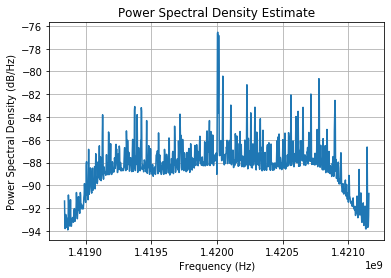

In [3]:
# 1024-bin resolution power spectrum 
# 49.6 dB of RtlSdr gain
# 2.32 MHz sample rate/bandwidth
# 1.420 GHz center frequency
# 10 sec integration time
f, p = col.run_spectrum_int(1024, 49.6, 2.32e6, 1.420e9, 10)
# Show the figure containing the plotted spectrum
fig = post.plot_spectrum(f, p, savefig='../images/spectrum_int.png')

And we can even run in frequency-switching mode, periodically retuning the SDR between two frequencies to reduce baseline bandpass shape and increase signal-to-noise on a spectral line!

Initializing rtl-sdr with pyrtlsdr:
  sample rate: 2.048000 MHz
  center frequency 89.090000 MHz
  gain: 49 dB
  num samples per call: 2048
  requested integration time: 2.0s
  => num samples to collect: 4096000
  => est. num of calls: 2000
  => num samples on each dwell: 409600
  => est. num of calls on each dwell: 200
  => num dwells total: 10
Integration began at Sun, 12 Jan 2020 12:46:25
Integration ended at Sun, 12 Jan 2020 12:46:30 after 4.414132833480835 seconds.
2000 spectra were measured, split between 89090000.0 and 89110000.0.
for an effective integration time of 2.00s


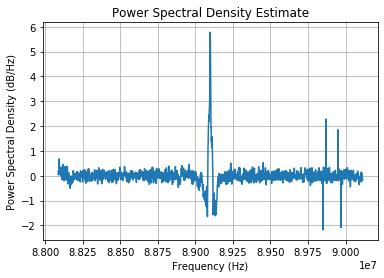

In [4]:
f, p = col.run_fswitch_int(2048, 49.6, 2.048e6, 89.09e6, 89.11e6, 2.0, fswitch=5)
fig = post.plot_spectrum(f, p, savefig='../images/fswitch_int.png')